In [341]:
import numpy as np, random, math
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

In [124]:
#Helper class for blackjack
class state:
    plasum = 0
    ace = False
    duce = False
    dealsum = 0
    def __init__(self, plasum, ace, duce, dealsum):
        self.plasum = plasum
        self.ace = ace
        self.duce = duce
        self.dealsum = dealsum
    def __hash__(self):
        return hash((self.plasum, self.ace, self.duce, self.dealsum))
    def __eq__(self, another):
        return (self.plasum, self.ace, self.duce, self.dealsum) == (another.plasum, another.ace, another.duce, another.dealsum)
    def copy(self):
        return state(self.plasum, self.ace, self.duce,self.dealsum)

In [145]:
#Helper Functions for Blackjack
def new_card():
    cards = [11, 2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10]
    return cards[random.randint(0, 12)]
def initial_choice(exploring, policy):
    if(not exploring):
        p1 = new_card()
        p2 = new_card()
        d1 = new_card()
        ace = (p1 == 11 or p2 == 11)
        duce = (d1 == 11)
        if(p1 == 11 and p2 == 11): p2 = 1
        s0 = state(p1 + p2, ace, duce, d1)
#         print(p1 + p2, ace, duce, d1)
#         a0 = policy[s0]
        return s0
    
    s0 = state(13, True, True, 11)
#     a0 = random.randint(0, 1)
    return s0


    
        
    

def gen_episode_blackjack(exploring, policy):
    s0 = initial_choice(exploring, policy)
    episode = []
    cur = s0
    if(cur.plasum == 21):
        episode.append([s0.copy(), 0])
        card = new_card()
        cur.dealsum += card
        if(cur.dealsum == 21):
            return episode, 0
        else:
            return episode, 1
    while(cur.plasum < 12):
#         print('a', end = '')
        card = new_card()
        cur.plasum += card
        if(cur.plasum > 21):
            card = 1
            cur.plasum -= 10
        cur.ace |= (card == 11)
        
#     print(cur.plasum)
    hit = policy[cur]
    if(exploring):
        hit = random.randint(0, 1)
    episode.append([s0.copy(), hit])

    while(hit):
        card = new_card()
        cur.plasum += card
        if(cur.plasum > 21 and card == 11):
            cur.plasum -= 10
            card = 1

        if(cur.plasum > 21 and cur.ace):
            cur.ace = False
            cur.plasum -= 10   
        if(cur.plasum > 21):
            break
        cur.ace |= (card == 11)
        if(not exploring):
            hit = policy[cur]
        else:
            hit = random.randint(0, 1)

        episode.append([cur.copy(), hit])
    if(cur.plasum > 21):
        return episode, -1
    while(cur.dealsum < 17):
        card = new_card()
        cur.dealsum += card
        if(cur.dealsum > 21 and card == 11):
            cur.dealsum -= 10
            card = 1
        if(cur.dealsum > 21 and cur.duce):
            cur.duce = False
            cur.dealsum -= 10            
        cur.duce |= (card == 11)
    if(cur.dealsum > 21 or cur.plasum > cur.dealsum):
        return episode, 1
    elif(cur.dealsum == cur.plasum):
        return episode, 0               
    else:
        return episode, -1
        
    
    
    

No usable Ace


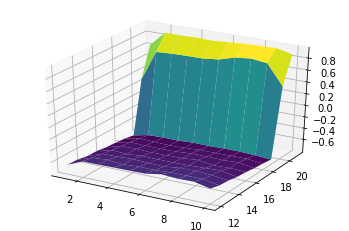

Usuable Ace


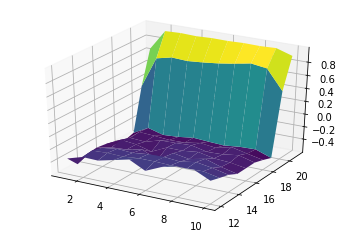

In [315]:
#Figure 5.1 Blackjack
policy = {}
for i in range(12, 20):
    for j in range(2,12):
        
        s = state(i,0,0, j)
        policy[s] = 1
        s = state(i,0,1, j)
        policy[s] = 1
        s = state(i,1,0, j)
        policy[s] = 1
        s = state(i,1,1, j)
        policy[s] = 1

for i in range(20, 22):
    for j in range(2,12):
        
        s = state(i,0,0, j)
        policy[s] = 0
        s = state(i,0,1, j)
        policy[s] = 0
        s = state(i,1,0, j)
        policy[s] = 0
        s = state(i,1,1, j)
        policy[s] = 0
# print(policy)
# print(policy[state(15, 0, 0, 3)])

rews = [[[[0, 0] for i in range(12)] for i in range(22)] for i in range(2)]

for i in range(500000):
    episode, res  = gen_episode_blackjack(False, policy)
    for i in episode:
        
        rew, n = rews[i[0].ace][i[0].plasum][i[0].dealsum]
        rew += res
        n += 1

        rews[i[0].ace][i[0].plasum][i[0].dealsum] = [rew, n]
#         print(i[0].ace, i[0].plasum , i[0].dealsum)
#         print(rews[0][20])
#     for i in episode:
#         print(i[0].plasum,i[1], end = ":  ")
#     print(res)
# print('fin', rews[0][20][2:12])
  
    
    
for i in rews:
    for j in i:
        for k in range(len(j)):
            if(j[k][1]):
                j[k] = j[k][0]/j[k][1] 
            else:
                j[k] = 0

for i in range(2):
    for j in range(22):
        rews[i][j][1] = rews[i][j][11]
        rews[i][j][11] = 0
        


x = [i for i in range(1, 11)]
y = [i for i in range(12, 22)]

X, Y = np.meshgrid(x, y)
Z = np.zeros(X.shape)

for i in range(len(x)):
    for j in range(len(y)):
#         print(i, j)
        Z[j, i] = rews[0][j + 12][i + 1]
# for i in range(12, 22):
#     print(rews[0][i][1:12])
# print(rews[0][21][1:11])
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,cmap='viridis', edgecolor='none');
print("No usable Ace")
plt.show()

for i in range(len(x)):
    for j in range(len(y)):
#         print(i, j)
        Z[j, i] = rews[1][j + 12][i + 1]
# for i in range(12, 22):
#     print(rews[0][i][1:12])
# print(rews[0][21][1:11])
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,cmap='viridis', edgecolor='none');
print("Usuable Ace")
plt.show()

# print(rews[0])

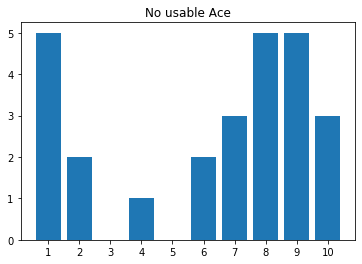

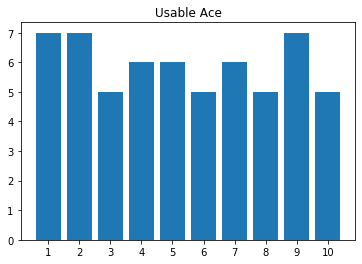

In [314]:
#Figure 5.2 BlackJack
policy = {}
for i in range(12, 22):
    for j in range(2,12):
        
        s = state(i,0,0, j)
        policy[s] = 1
        s = state(i,0,1, j)
        policy[s] = 1
        s = state(i,1,0, j)
        policy[s] = 1
        s = state(i,1,1, j)
        policy[s] = 1


# print(policy)
# print(policy[state(15, 0, 0, 3)])

rews = [[[[0, 0] for i in range(12)] for i in range(22)] for i in range(2)]
qsa = {}
alpha = 0.1
for i in range(200000):
    episode, res  = gen_episode_blackjack(False, policy)
    for i in episode:
        
        s, a = i
        
        if((s, 1) not in qsa):
            qsa[(s, 1)] = [0, 0]
            
        
        if((s, 0) not in qsa):
            qsa[(s, 0)] = [0, 0]
        qsa[(s, a)][1] += 1
        qsa[(s, a)][0] = qsa[(s, a)][0]*(1- alpha) + res*alpha
        

        if(qsa[(s, 0)][0] >= qsa[(s, 1)][0]):
            policy[s] = 0
        else:
            policy[s] = 1
        

net = [0 for i in range(12)]
for i in range(21, 11, -1):
    for j in range(2, 12):
        
        s = state(i, 0, j == 11, j)
        net[j] += policy[s]
    
#     print()
print()    
net1 = [net[-1]] + net[2:-1]
y_pos = np.arange(len(net1))

objects = [i for i in range(1, 11)]
plt.bar(y_pos, net1, align='center')
plt.xticks(y_pos, objects)
plt.title('No usable Ace')
plt.show()
net = [0 for i in range(12)]
for i in range(21, 11, -1):
    for j in range(2, 12):
        s = state(i, 1, j == 11, j)
        net[j] += policy[s]
#     print()

net1 = [net[-1]] + net[2:-1]
y_pos = np.arange(len(net1))

objects = [i for i in range(1, 11)]
plt.bar(y_pos, net1, align='center')
plt.xticks(y_pos, objects)
plt.title('Usable Ace')

plt.show()




In [ ]:
##Incomplete 5.3
policy = {}
for i in range(12, 20):
    for j in range(2,12):
        
        s = state(i,0,0, j)
        policy[s] = 1
        s = state(i,0,1, j)
        policy[s] = 1
        s = state(i,1,0, j)
        policy[s] = 1
        s = state(i,1,1, j)
        policy[s] = 1

for i in range(20, 22):
    for j in range(2,12):
        
        s = state(i,0,0, j)
        policy[s] = 0
        s = state(i,0,1, j)
        policy[s] = 0
        s = state(i,1,0, j)
        policy[s] = 0
        s = state(i,1,1, j)
        policy[s] = 0
# print(policy)
# print(policy[state(15, 0, 0, 3)])

rews = [[[[0, 0] for i in range(12)] for i in range(22)] for i in range(2)]

for i in range(50000):
    episode, res  = gen_episode_blackjack(True, policy)
    i = episode[0]
        
    rew, n = rews[i[0].ace][i[0].plasum][i[0].dealsum]
    rew += res
    n += 1

    rews[i[0].ace][i[0].plasum][i[0].dealsum] = [rew, n]
#         print(i[0].ace, i[0].plasum , i[0].dealsum)
#         print(rews[0][20])
#     for i in episode:
#         print(i[0].plasum,i[1], end = ":  ")
#     print(res)
# print('fin', rews[0][20][2:12])
  
    
    
for i in rews:
    for j in i:
        for k in range(len(j)):
            if(j[k][1]):
                j[k] = j[k][0]/j[k][1] 
            else:
                j[k] = 0

for i in range(2):
    for j in range(22):
        rews[i][j][1] = rews[i][j][11]
        rews[i][j][11] = 0
        


x = [i for i in range(1, 11)]
y = [i for i in range(12, 22)]

X, Y = np.meshgrid(x, y)
Z = np.zeros(X.shape)

for i in range(len(x)):
    for j in range(len(y)):
#         print(i, j)
        Z[j, i] = rews[0][j + 12][i + 1]
# for i in range(12, 22):
#     print(rews[0][i][1:12])
# print(rews[0][21][1:11])
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,cmap='viridis', edgecolor='none');
plt.show()

for i in range(len(x)):
    for j in range(len(y)):
#         print(i, j)
        Z[j, i] = rews[1][j + 12][i + 1]
# for i in range(12, 22):
#     print(rews[0][i][1:12])
# print(rews[0][21][1:11])
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,cmap='viridis', edgecolor='none');
plt.show()

# print(rews[0])



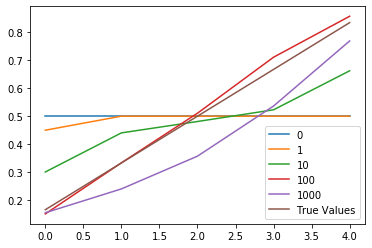

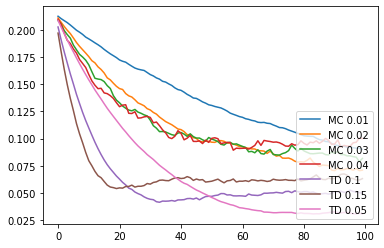

In [352]:
#Random Walks example 6.2
def policy(s):
    pos = [-1, 1]
    return pos[random.randint(0, 1)]

def result(s, a):
    s += a
    if(s == 6):
        return 1, s
    return 0, s

v = [0.5 for i in range(7)]
v[0] = 0
v[6] = 0
alpha = 0.1
prod = 1
plt.plot(v[1:6], label = "0")
        
for i in range(1001):
    s = 3
    if(i == prod):
        plt.plot(v[1:6], label = str(prod))
        prod *= 10

        
    while(s != 0 and s != 6):
        a = policy(s)
        r, s1 = result(s, a)
        v[s] = v[s] + alpha*(r + v[s1] - v[s])
        s = s1
v1 = [i/6 for i in range(1, 6)]
plt.plot(v1, label = "True Values")
# print(v[1:6])
plt.legend(loc = 'lower right')
plt.show()



alps1 = [0.01, 0.02, 0.03, 0.04]
for alpha in alps1:
    truev = [i/6 for i in range(1, 6)]
    truev = [0] + truev + [0]
    error = [0 for i in range(100)]
    for t in range(100):
        v = [0.5 for i in range(7)]
        v[0] = 0
        v[6] = 0
        for i in range(100):
            epi = []
            s = 3
            while(s != 0 and s != 6):
                epi.append(s)
                a = policy(s)
                r, s1 = result(s, a)
                s = s1
                
            r = s//6
            for j in epi[::-1]:
                v[j] +=  alpha*(r - v[j])
            err = 0
            for j in range(1, 6):
                err += (v[j] - truev[j])**2
            err /= 6
            err = math.sqrt(err)
            error[i] += err
    
    for i in range(100):
        error[i] /= 100
    plt.plot(error, label = "MC " + str(alpha))
    
    
    
alps1 = [0.1, 0.15, 0.05]
for alpha in alps1:
    truev = [i/6 for i in range(1, 6)]
    truev = [0] + truev + [0]
    error = [0 for i in range(100)]
    for t in range(100):
        v = [0.5 for i in range(7)]
        v[0] = 0
        v[6] = 0
        for i in range(100):
            s = 3
            while(s != 0 and s != 6):
                a = policy(s)
                r, s1 = result(s, a)
                v[s] = v[s] + alpha*(r + v[s1] - v[s])
                s = s1

            err = 0
            for j in range(1, 6):
                err += (v[j] - truev[j])**2
            err /= 6
            err = math.sqrt(err)
            error[i] += err
    
    for i in range(100):
        error[i] /= 100
    plt.plot(error, label = "TD " + str(alpha))
    
    
plt.legend(loc = 'lower right')
plt.show()






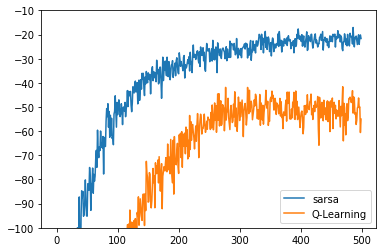

In [313]:
#Q-learning vs Sarsa
m ,n = 12, 4
e = 0.1
inf = 1e18
def result(s, a):
    actions = ['l', 'r', 'u', 'd']
    a = actions[a]
    if(a == 'l'):
        if(s%m > 0):
            s -= 1 
        return s, -1
    elif(a == 'r'):
        if(s%m < m - 1):
            s += 1
        if(s//m == n -1 ):
            return (n -1)*m, -100
        return s, -1
    elif(a == 'u'):
        if(s//m > 0):
            s -= m
        return s, -1
    else:
        if(s//m < n - 1):
            s += m
        if(s//m == n - 1 and 0 < s%m < n - 1):
            return (n-1)*m, -100
        return s, -1
    

def policy(s, q):
    x = random.uniform(0, 1)
    if(x < e):
        action = random.randint(0, 3)
        return action
    a1 = np.argmax(q[s])
    return a1
    
    
def sarsa():
    rews = [0 for i in range(500)]
    sum1 = 0
    for i in range(100):
        q = [[0 for i in range(4)] for i in range(n*m)]

        for i in range(500):
            s = (n - 1)*m
            a = int(policy(s, q))
            rew = 0

            while(s != m*n - 1):
    #             print(a)
    #             if(s ==  (n-1)*m - 1):
    #                 print(s, a)
                s1, r = result(s, a)
                a1 = policy(s1, q)
                q[s][a] += alpha*(r + q[s1][a1] - q[s][a])
                s = s1
                a = a1
                rew += r
            rews[i] += rew
    rews = [rews[i]/100 for i in range(500)]
    plt.plot(rews, label = "sarsa")

    
    
    
def qlearning():
    rews = [0 for i in range(500)]
    sum1 = 0
    for i in range(200):
        q = [[0 for i in range(4)] for i in range(n*m)]

        for i in range(500):
            s = (n - 1)*m
            rew = 0
            while(s != (m*n - 1)):
                a = policy(s, q)
                s1, r = result(s, a)
                q1 = max(q[s1])
                q[s][a] += alpha * (r + q1 - q[s][a])
                s = s1
                rew += r
            rews[i] += (rew)
    rews = [rews[i]/100 for i in range(500)]
    
    plt.plot(rews, label = "Q-Learning")
sarsa()
qlearning()
plt.legend(loc = 'lower right')
plt.ylim([-100,-10])
# plt.suptitle("Stationary %optimal acti")
plt.show()